<a href="https://colab.research.google.com/github/Evaggelou/Stack-Overflow-Survey/blob/main/Stack_Overflow_Survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# StackOverflow survey 2017

##1. Business Understanding

These are the 3 guiding questions for our analysis:

* How many of them were Men, Women, and other genders? Are the Men and Women equally satisfied with their jobs?
* Does the programming become less challenging with the years of experience?
* Is the salary an important indicator for the satisfaction of the employers in the community of programming?


## 2. Data Understanding¶
The dataset has 2 parts/files:

- survey-results-schema.csv file: contains code book for columns in "survey-results-public.csv" file, it shows detailed description of the question asked.
- survey-results-public.csv: contains actual survey result
The code that has been used is available at the jupyter notebook with title: "Stack_Overflow_Survey.ipynb" and it is also available at google colab.

### 2.1 Initial Data Assessment

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive

# Import the Files from google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# check schema file
schema=pd.read_csv("/content/drive/MyDrive/Medium_data/developer_survey_2017/survey_results_schema.csv")
schema.head()

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [3]:
# check the file with questions
data=pd.read_csv("/content/drive/MyDrive/Medium_data/developer_survey_2017/survey_results_public.csv")
data.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,...,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,...,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At least once each week,Haven't done at all,Once or twice,Haven't done at all,Haven't done at all,Several times,Several times,Once or twice,Somewhat agree,Strongly disagree,Strongly disagree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup...",9 to 10 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a hard ""g,"" like ""gift""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Satisfied,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,I have created a CV or Developer Story on Stac...,8.0,Desktop; iOS browser; iOS app; Android browser...,Several times,Several times,Once or twice,Once or twice,Once or twice,Haven't done at all,Several times,At least once each week,Disagree,Strongly disagree,Strongly disagree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,20 or more years,20 or more years,NaN,Other,NaN,NaN,NaN,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a hard ""g,"" like ""gift""",Strongly agree,Strongly agree,Strongly agree,Somewhat agree,Agree,Strongly agree,Agree,Somewhat agree,Disagree,Disagree,Agree,...,Very satisfied,A lot of influence,Some influence,Some influence,Some influence,A lot of influence,Some influence,Some i

In [4]:
data.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [5]:
# Print all the avalible features
columns = data.columns
print(list(columns))

['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University', 'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote', 'CompanySize', 'CompanyType', 'YearsProgram', 'YearsCodedJob', 'YearsCodedJobPast', 'DeveloperType', 'WebDeveloperType', 'MobileDeveloperType', 'NonDeveloperType', 'CareerSatisfaction', 'JobSatisfaction', 'ExCoderReturn', 'ExCoderNotForMe', 'ExCoderBalance', 'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills', 'ExCoderWillNotCode', 'ExCoderActive', 'PronounceGIF', 'ProblemSolving', 'BuildingThings', 'LearningNewTech', 'BoringDetails', 'JobSecurity', 'DiversityImportant', 'AnnoyingUI', 'FriendsDevelopers', 'RightWrongWay', 'UnderstandComputers', 'SeriousWork', 'InvestTimeTools', 'WorkPayCare', 'KinshipDevelopers', 'ChallengeMyself', 'CompetePeers', 'ChangeWorld', 'JobSeekingStatus', 'HoursPerWeek', 'LastNewJob', 'AssessJobIndustry', 'AssessJobRole', 'AssessJobExp', 'AssessJobDept', 'AssessJobTech', 'AssessJobProjects', 'AssessJobCompensation', '

In [6]:
# Check the education Types
edu_type = data['EducationTypes'].value_counts().reset_index()
edu_type.head()

,index,EducationTypes
0,Self-taught,3691
1,Online course; Self-taught,1875
2,Self-taught; Open source contributions,1751
3,On-the-job training; Self-taught,1687
4,Online course; On-the-job training; Self-taught,1276


In [7]:
#First of all let's clean the data
#Here we are no dealing with any null value as it will automatically not be considered

def clean_series(df,col_name):
    """
    inputs: 
    df: dataframe which you want to manipulate
    col_name: name of the column which you want to clean the data
    
    outputs:
    df2: Panda's dataframe with the unique element seperated and
         their count
    """
    temp = df[col_name]
    temp = temp.dropna().reset_index()
    temp = temp[col_name].str.split(';')
    emp_list=[]
    for i in range(len(temp)):
        emp_list += temp[i]

    for i in range(len(emp_list)):
        emp_list[i] = emp_list[i].strip()

    emp_set = list(set(emp_list))    
    emp_set

    c = Counter(emp_list)
    print(c.items())
    df2 = pd.DataFrame({'Methods':list(c.keys()),'Counts':list(c.values())})
    
    return df2

In [8]:
from collections import Counter
methods = clean_series(data,'EducationTypes').sort_values(by='Counts')
methods

dict_items([('Online course', 13792), ('Open source contributions', 11225), ('Self-taught', 27330), ('Hackathon', 7150), ('Coding competition', 6683), ('Part-time/evening course', 4654), ('On-the-job training', 12508), ('Bootcamp', 2727), ('Industry certification', 4472)])


,Methods,Counts
7,Bootcamp,2727
8,Industry certification,4472
5,Part-time/evening course,4654
4,Coding competition,6683
3,Hackathon,7150
1,Open source contributions,11225
6,On-the-job training,12508
0,Online course,13792
2,Self-taught,27330


## How many of them were Men, Women, and other genders? Are the Men and Women equally satisfied with their jobs?

1.   Count the different genders
2.   Check career and Job satisfaction
3.   Is the dieversity importand for the different genders



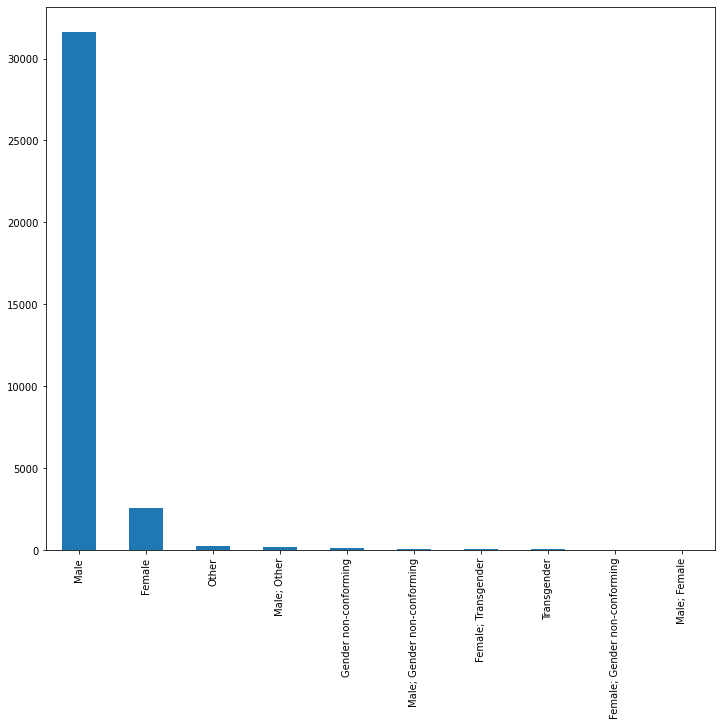

In [9]:
# visualising the gender distribution in the survey 

# Count the different genders
data["Gender"].value_counts()[0:10].plot(kind='bar',figsize=(12,10));

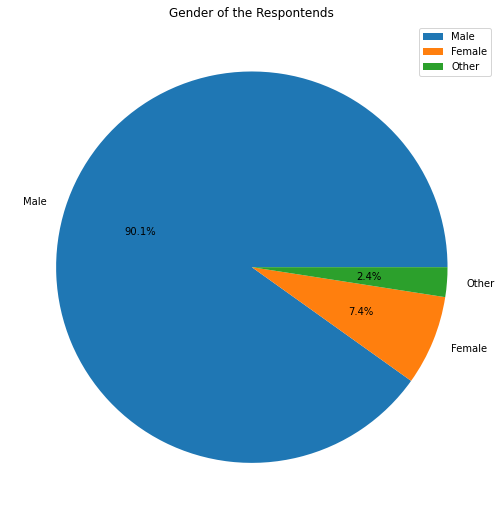

In [10]:
# groups the genders except Men and women

# Select the 2 most common genders and append to a list
counts_genders =list(data["Gender"].value_counts()[:2]) 
counts_genders.append(sum(list(data["Gender"].value_counts()[2:])))
# count the rest genders and append it to the previous list
labels=list(data["Gender"].value_counts().index[:2])
labels.append("Other")

# plot the percentages at each gender
fig, ax =plt.subplots(figsize=(10,9))
plt.title('Gender of the Respontends')
ax.pie(counts_genders,labels=labels, autopct='%1.1f%%');
ax.legend(labels=data["Gender"].value_counts().index, loc="upper right");

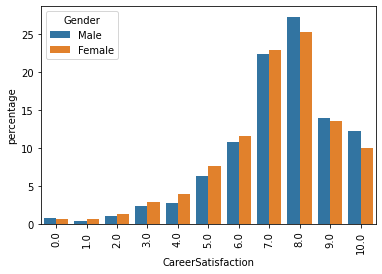

In [11]:
# Select only the 2 gender with the most participants
# Plot percentage of CareerSatisfaction per Gender

# finf the CareerSatisfaction per gender and find different categories
df = data[(data["Gender"]=="Male") | (data["Gender"]=="Female")]

# Plot percentage of CareerSatisfaction per Gender
grouped = df.groupby(['Gender'], sort=False)
JobSatisfaction_counts = grouped['CareerSatisfaction'].value_counts(normalize=True, sort=False)
# find the percentage according to each category and Gender
Satisfaction_data = [
    {'CareerSatisfaction': JobSatisfaction, 'Gender': Gender, 'percentage': percentage*100} for 
    (Gender, JobSatisfaction), percentage in dict(JobSatisfaction_counts).items()
]

df_Satisfaction = pd.DataFrame(Satisfaction_data)

p = sns.barplot(x="CareerSatisfaction", y="percentage", hue="Gender", data=df_Satisfaction)
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels

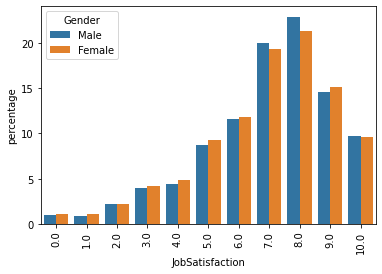

In [12]:
# Plot percentage of JobSatisfaction per Gender

# finf the Job satisfaction per gender and find different categories
grouped = df.groupby(['Gender'], sort=False)
JobSatisfaction_counts = grouped['JobSatisfaction'].value_counts(normalize=True, sort=False)
# find the percentage according to each category and Gender
Satisfaction_data = [
    {'JobSatisfaction': JobSatisfaction, 'Gender': Gender, 'percentage': percentage*100} for 
    (Gender, JobSatisfaction), percentage in dict(JobSatisfaction_counts).items()
]
# put Satisfaction_data in order to plot easier 
df_Satisfaction = pd.DataFrame(Satisfaction_data)

p = sns.barplot(x="JobSatisfaction", y="percentage", hue="Gender", data=df_Satisfaction)
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels

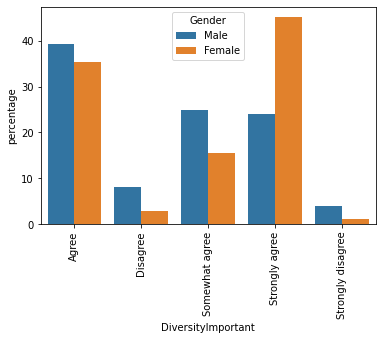

In [13]:
# Plot percentage of DiversityImportant per Gender

grouped = df.groupby(['Gender'], sort=False)
JobSatisfaction_counts = grouped['DiversityImportant'].value_counts(normalize=True, sort=False)
# find the percentage according to each category and Gender
Satisfaction_data = [
    {'DiversityImportant': JobSatisfaction, 'Gender': Gender, 'percentage': percentage*100} for 
    (Gender, JobSatisfaction), percentage in dict(JobSatisfaction_counts).items()
]

df_Satisfaction = pd.DataFrame(Satisfaction_data)

p = sns.barplot(x="DiversityImportant", y="percentage", hue="Gender", data=df_Satisfaction)
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels

## Does the programming become less challenging with the years of experience?



1.   How many years code the most participants
2.   For how many years did you code as part of your job?



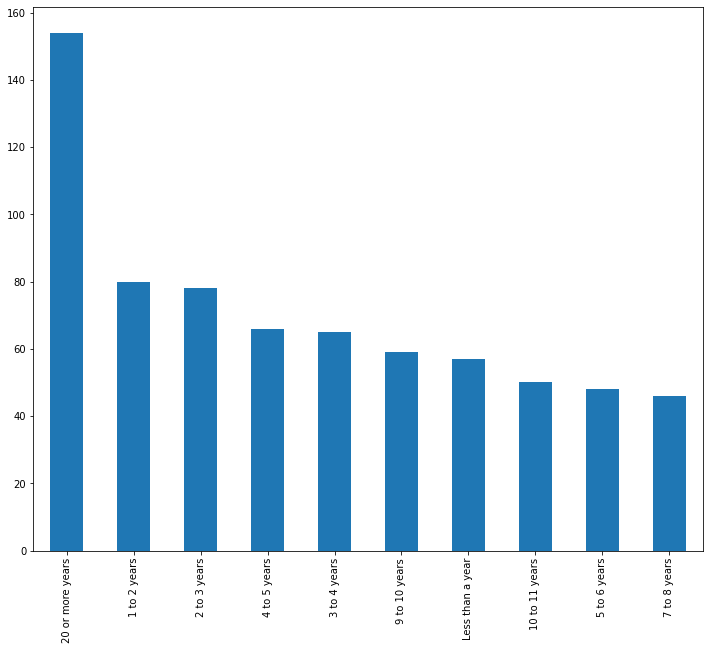

In [14]:
#For how many years did you code as part of your job?
data["YearsCodedJobPast"].unique()
data["YearsCodedJobPast"].value_counts()[0:10].plot(kind='bar',figsize=(12,10));

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text major ticklabel objects>)

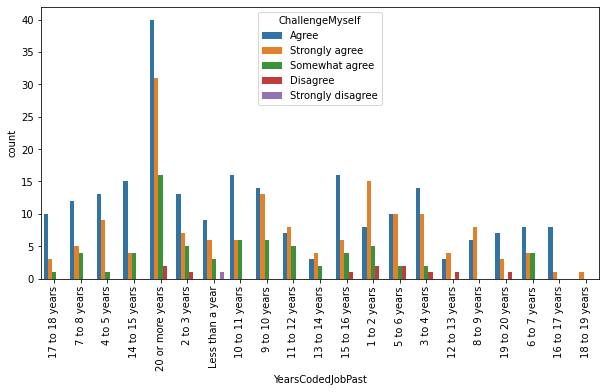

In [15]:
# data["ChallengeMyself"].unique()
# data[["YearsCodedJobPast","ChallengeMyself"]].value_counts()[0:10].plot(kind='bar', stacked=True,figsize=(12,10));

#For how many years did you code as part of your job?
plt.figure(figsize=(10,5))
ax = sns.countplot(x="YearsCodedJobPast", hue="ChallengeMyself", data=df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text major ticklabel objects>)

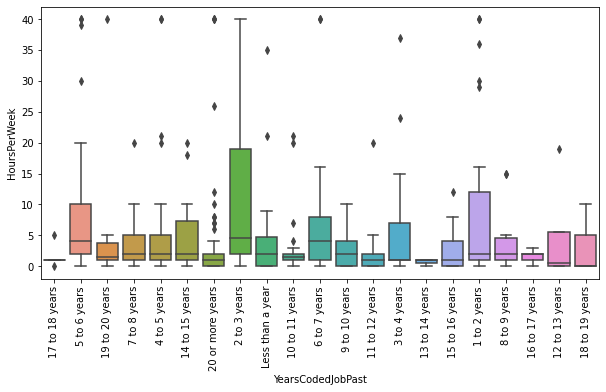

In [16]:
# For how many hours per week you should code as the year pass
# create a boxplot with working hours per week
# with different categories the year of experience 
df2= data[["HoursPerWeek","YearsCodedJobPast"]]
plt.figure(figsize=(10,5))
sns.boxplot(x="YearsCodedJobPast", y="HoursPerWeek", data=df2)# boxplot
plt.xticks(rotation=90)

## Is the salary an important indicator for the satisfaction of the employers in the community of programming?

In [26]:
# Check the column with the important benefits
data["ImportantBenefits"].head()

0     Stock options; Vacation/days off; Remote options
1                                                  NaN
2                                                  NaN
3    Stock options; Annual bonus; Health benefits; ...
4                                                  NaN
Name: ImportantBenefits, dtype: object

In [17]:
# Find all the different benefitr

# split the important benefits per answer in ; marker
benefits = data["ImportantBenefits"].str.split(pat=";",expand=True)
# append all of them to a list
t=[]
t.append(benefits[0].unique().tolist())
t.append(benefits[1].unique().tolist())
t.append(benefits[2].unique().tolist())
t.append(benefits[3].unique().tolist())
t.append(benefits[4].unique().tolist())
# Flat that list
flat_list = [item for sublist in t for item in sublist]
set(flat_list)

{' Annual bonus',
 ' Charitable match',
 ' Child/elder care',
 ' Education sponsorship',
 ' Equipment',
 ' Expected work hours',
 ' Health benefits',
 ' Long-term leave',
 ' Meals',
 ' None of these',
 ' Other',
 ' Private office',
 ' Professional development sponsorship',
 ' Remote options',
 ' Retirement',
 ' Vacation/days off',
 'Annual bonus',
 'Charitable match',
 'Child/elder care',
 'Education sponsorship',
 'Equipment',
 'Expected work hours',
 'Health benefits',
 'Long-term leave',
 'Meals',
 None,
 'None of these',
 'Other',
 'Private office',
 'Professional development sponsorship',
 'Remote options',
 'Retirement',
 'Stock options',
 'Vacation/days off',
 nan}

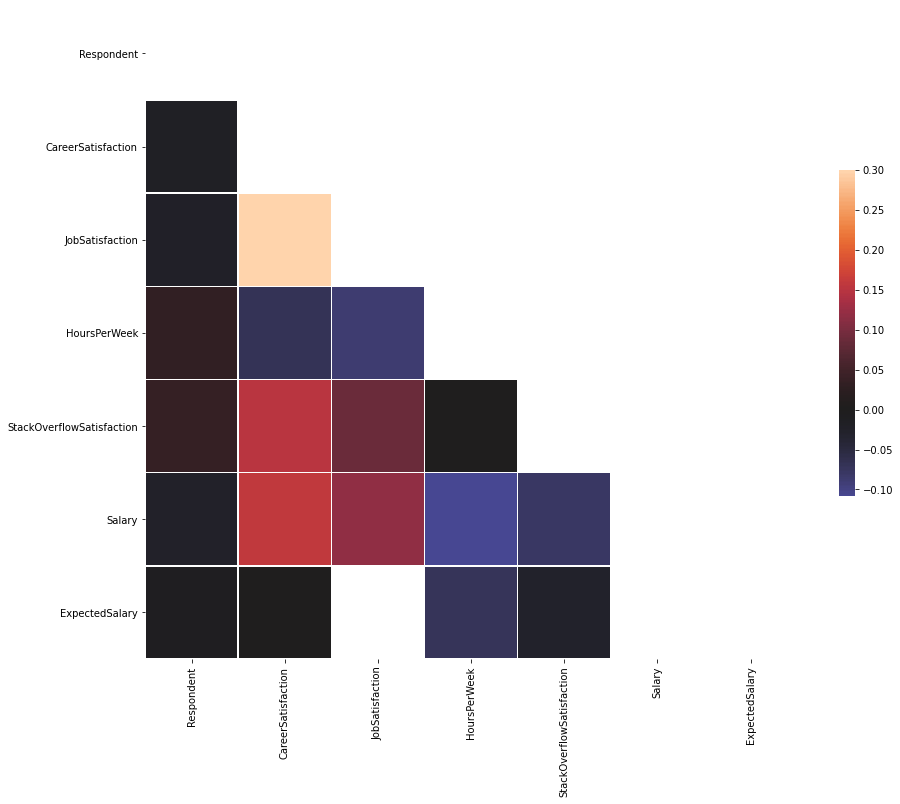

In [18]:
# Correlation matrix
corr = df.corr()

# Create a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up figure
f, ax = plt.subplots(figsize=(15, 12))

# Plot the heatmap
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

<Figure size 864x360 with 0 Axes>

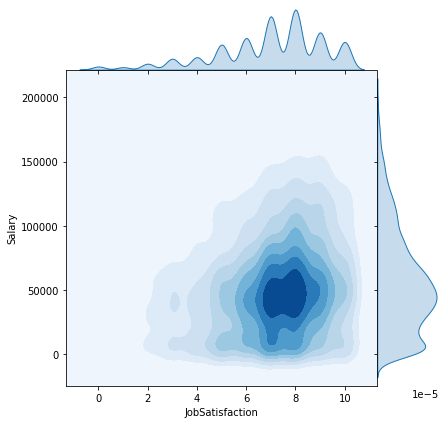

In [19]:
# Draw a plot of JobSatisfaction & Salary with bivariate and univariate graphs.
plt.figure(figsize=(12,5));
sns.jointplot(x= data['JobSatisfaction'],y=data['Salary'],kind='kde',
              space=0, fill=True, thresh=0, cmap='Blues');

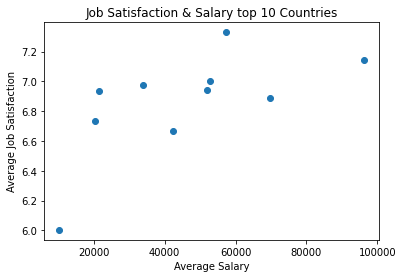

In [20]:
# Calculate average job satisfaction and salary for major countries

df = df.dropna(subset=['JobSatisfaction','Salary'], axis=0)
major_countries = df['Country'].value_counts()[:10].keys()

sal_mean = []
sat_mean = []
# fin the mean of JobSatisfaction & Salary per country
for i in range(len(major_countries)):
    sat_mean.append(df.loc[df['Country'] == major_countries[i]]['JobSatisfaction'].mean())
    sal_mean.append(df.loc[df['Country'] == major_countries[i]]['Salary'].mean())
    
# Compare these values by a scatter plot

plt.title("Job Satisfaction & Salary top 10 Countries")
plt.ylabel("Average Job Satisfaction")
plt.xlabel("Average Salary")
plt.scatter(sal_mean, sat_mean)
plt.show()